<a href="https://colab.research.google.com/github/marcelegv/AnaliseExploratoria/blob/main/Dataset_Sale_An%C3%A1lise_de_Dados_e_Boas_Pr%C3%A1ticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Marcele Garcez Veiga

**Matrícula:** 4052025000206

**Dataset:** [Estatísticas de Vendas 2023](https://www.kaggle.com/datasets/sahilislam007/sales-dataset/data)



# Descrição do Problema

O conjunto de dados apresentado registra as compras de clientes durante o ano de 2023. Ele captura atributos críticos e multivariados do cliente, como idade e sexo, juntamente com detalhes de transação, incluindo a categoria do produto, quantidade comprada e quantidade total gasta.
Inicialmente, o objetivo principal é analisar os padrões de gastos de certos grupos de pessoas ao longo do ano objeto do estudo.

## Hipóteses do Problema

As hipóteses que tracei são as seguintes:

- A sazonalidade nas compras é diferente entre os gêneros?

- O ticket médio por compra varia entre faixas etárias?

- Existe uma correlação entre a época da compra e a faixa etária do consumidor?

## Tipo de Problema

Este é um problema de **regressão supervisionada**. Dado um conjunto de características (data da compra, gênero, idade, categoria do produto, quantidade, preço por unidade e quantidade total), o objetivo é prever o valor total gasto em uma transação, ou seja, prever a quantidade total vendida. Logo, podemos dizer que se trata de um aprendizado supervisionado uma vez que os dados são rotulados, com entrada e saídas desejadas; e que estamos diante de um problema de regressão pois desejamos fazer a predição de um valor numérico.

## Seleção de Dados

O dataset escolhido foi selecionado da plataforma Kaggle, que consiste em uma plataforma online que oferece ferramentas e recursos para aprender, compartilhar, competir e colaborar na área da ciência de dados.
Não é necessária uma etapa de seleção de dados externa, pois o dataset já está curado e pronto para uso.

O dataset Sales não possui valores faltantes (missings). Para efeitos didáticos do notebook desenvolvidos, excluímos alguns valores, deixando o dataSet trabalhado com valores faltantes que serão manipulados mais a frente.

## Atributos do Dataset

O dataset Sales contém 1000 amostras, com sete atributos, distribuídos da seguinte forma:

- ***Data*** (data da transação)
- ***Gênero*** (gênero do cliente: masculino ou feminino)
- ***Idade*** (idade do cliente no momento da compra)
- ***Categoria do Produto*** (categoria do item comprado)
- ***Quantidade*** (número de unidades compradas na transação)
- ***Preço por unidade*** (custo de um item na categoria selecionada)
- ***Quantidade total*** (Valor total gasto (Quantidade x Preço por Unidade))

# Importação das Bibliotecas Necessárias

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização.

In [1]:
import pandas as pd
from IPython.display import display # Importando a função display. Houve necessidade de importar pois
# como a renderização automática de tabelas em ambientes como Colab geralmente ocorre para a última saída de uma célula,
# a função display() força a renderização de um objeto (como um DataFrame) a qualquer momento,
#independentemente de ser a última linha da célula.
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Necessária para incluir o gráfico de linhas com os meses em português
import matplotlib.dates as mdates
import matplotlib.ticker as mticker  # Importa mticker para FuncFormatter

# Útil para Dividir dados em treino e teste (para treinar e avaliar o modelo)
from sklearn.model_selection import train_test_split

#Útil para o Escalonamento de Features Numéricas na etapa de pré-processamento
#Apenas "Age" como variável numérica direta
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Criação das funções

Esta seção consolida todas as funções necessárias para a análise, visualização e pré-processamento dos dados, bem como os parâmetros para sua utilização.

In [15]:
def define_titulo_eixos(t,x,y):
    # Adiciona títulos e rótulos aos gráficos que serão criados
    # Parâmetros: Título do Gráfico, Rótulo do eixo X e Rótulo do eixo Y
    plt.title(t, fontsize=16)
    plt.xlabel(x, fontsize = 12)
    plt.ylabel(y, fontsize = 12)

def formatar_mes(x, pos):
    # x é o valor numérico da data no matplotlib (dias desde 0001-01-01)
    # Convertemos x para um objeto datetime
    data_dt = mdates.num2date(x)

    # Pegamos o número do mês (1 a 12) e ajustamos para o índice da lista (0 a 11)
    nome_mes = meses_portugues[data_dt.month - 1]

    # Pegamos o ano diretamente do objeto datetime
    ano = data_dt.year

    # Retornamos a string formatada como "Mês Ano"
    return f"{nome_mes}/{ano}"

def configurar_eixo_x_datas(ax, formatador_personalizado):
    #Configura o eixo X de um gráfico Matplotlib para exibir datas
    #   com localizadores de mês e um formatador personalizado.

    #   Parâmetros:
    #   ax : matplotlib.axes.Axes //O objeto Axes do Matplotlib ao qual as configurações serão aplicadas.
    #   formatador_personalizado : function //A função que será usada para formatar os rótulos do eixo X.
    #        Deve aceitar dois argumentos (valor numérico da data, posição do tick).

    # Define o localizador principal para ticks mensais
    ax.xaxis.set_major_locator(mdates.MonthLocator())

    # Aplica o formatador customizado ao eixo X
    ax.xaxis.set_major_formatter(mticker.FuncFormatter(formatador_personalizado))

    # Rotaciona os rótulos para evitar sobreposição se houver muitos ticks
    plt.gcf().autofmt_xdate()

def finalizar_e_salvar_grafico(nome_arquivo):
    #Ajusta o layout do gráfico, salva em um arquivo e o exibe.
    #Argumentos: nome_arquivo (str): O nome do arquivo para salvar o gráfico.

    plt.tight_layout()  # Ajusta o layout para evitar sobreposição
    plt.savefig(nome_arquivo) # Salva o gráfico com o nome especificado
    plt.show() # Exibe o gráfico

# Carga de Dados

Nesta seção, realizaremos o carregamento inicial do dataset Sales a partir da leitura de um arquivo no formato CSV e exibiremos uma mensagem de acordo com o status do carregamento, bem como as primeiras linhas em caso de sucesso.

In [3]:
try:
  vd = pd.read_csv('Sales_Dataset.csv')
  print("Dataset Vendas carregado com sucesso!")
  if not vd.empty: # Verifica se o DataFrame não está vazio
    print("\n--- Exibindo as primeiras 5 linhas do Dataset Vendas ---")
    # Renomeando a primeira coluna, sem alterar o arquivo original
    vd = vd.rename(columns={vd.columns[0]: 'Sale Number'})
    display(vd.head())
  else:
    print("\n--- Não há informações sobre vendas disponíveis! ---")
except FileNotFoundError:
    print("Erro: O arquivo 'Sales_Dataset.csv' não foi encontrado. Verifique o nome e o caminho do arquivo.")
except Exception as e:
    print(f"Ocorreu um erro ao carregar o dataset: {e}")

Dataset Vendas carregado com sucesso!

--- Exibindo as primeiras 5 linhas do Dataset Vendas ---


,Sale Number,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,0,2023-11-24,Male,34,Beauty,3,50,150
1,1,2023-02-27,Female,26,Clothing,2,500,1000
2,2,2023-01-13,Male,50,Electronics,1,30,30
3,3,2023-05-21,Male,37,Clothing,1,500,500
4,4,2023-05-06,Male,30,Beauty,2,50,100


# Definição de variáveis

Esta etapa define todas as variáveis que serão utilizadas durante as Análises, Pré-processamento e Visualização dos dados.

In [32]:
# Guarda a cópia do Dataframe original
#vd_original = vd.copy()

# Definindo as Faixas Etárias
# Consideramos as faixas de 18 (inclusive) a 65 (exclusive) considerando as idades
# mínimas e máximas identificadas na etapa de estatísticas descritivas básicas
bins = [18, 25, 35, 45, 55, 65]
labels = ['19-25', '26-35', '36-45', '46-55', '56-65']

# Definindo um número de bins que será utilizado no histograma (Ticket médio por compra com frequência)
num_bins = 10

# Lista de nomes de meses em português
# Os índices da lista (0-11) correspondem aos meses (1-12)
meses_portugues = [
    'Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
    'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'
]

# Para visualização no mapa de calor, usaremos os nomes dos dias da semana em português
day_names = {
    0: 'Segunda',
    1: 'Terça',
    2: 'Quarta',
    3: 'Quinta',
    4: 'Sexta',
    5: 'Sábado',
    6: 'Domingo'
}

# Definição de Variáveis de Imputação
# Definindo 'empty_genero'
empty_genero = 'Não informado'

# Análise de Dados

Nesta etapa de Análise de Dados Exploratória (EDA) sobre o dataset Sales, visamos entender a distribuição, as relações e as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

## Total e Tipo das Instâncias

O dataset Sales possui 1000 instâncias (observações). Há quatro características de medição que são de tipo numérico (int64) e 3 atributos categóricos, sendo eles Data ("Date"), Gênero("Gender") e Categoria de Produtos("Product Category").

In [8]:
print(f"Total de instâncias: {len(vd)}")
print("\nTipos de dados por coluna:")

print(vd.info())

Total de instâncias: 1000

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Sale Number       1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Gender            1000 non-null   object
 3   Age               1000 non-null   int64 
 4   Product Category  1000 non-null   object
 5   Quantity          1000 non-null   int64 
 6   Price per Unit    1000 non-null   int64 
 7   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 62.6+ KB
None


###Distribuição de vendas por gênero

Uma breve análise sobre a distribuição de vendas por gênero durante o ano de 2023.

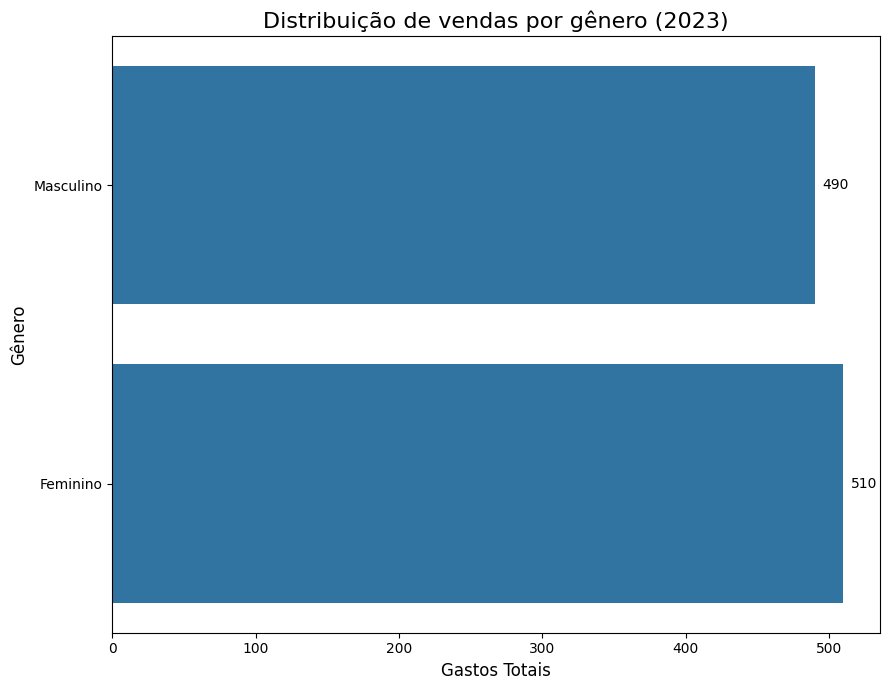

In [20]:
# Garantindo que a coluna 'Gender' esteja em seu estado inicial para o mapeamento
vd = vd_original.copy()

# Mapeando os valores da coluna 'Gender' para português ---
vd['Gender'] = vd['Gender'].map({'Male': 'Masculino', 'Female': 'Feminino'})

plt.figure(figsize=(9, 7))
# gráfico de barras
ay = sns.countplot(y='Gender', data=vd)

# Adiciona as Quantidades Exatas nas Barras
# Itera sobre cada 'patch' (que representa uma barra) no Axes do gráfico
for p in ay.patches:
    # 'p' é um objeto Rectangle que representa cada barra

    # Para barras horizontais:
    # get_width() é o valor da barra (a contagem)
    # get_y() é a coordenada Y do início da barra
    # get_height() é a altura da barra (espessura)

    largura = p.get_width() # A 'quantidade' para a barra horizontal
    y_posicao = p.get_y() + p.get_height() / 2 # Centro vertical da barra

    # Adiciona o texto no final (direita) da barra
    ay.text(
        largura + 5,      # Posição X: um pouco à direita do final da barra
        y_posicao,        # Posição Y: centralizado verticalmente na barra
        f'{int(largura)}',# O texto a ser exibido (convertido para inteiro)
        ha='left',        # Alinhamento horizontal: texto começa à esquerda da posição X
        va='center',      # Alinhamento vertical: texto centralizado na posição Y
        fontsize=10,
        color='black'
    )

# Chamada da função para adicionar títulos e rótulos
define_titulo_eixos('Distribuição de vendas por gênero (2023)', 'Gastos Totais', 'Gênero')

# Chamada da função para imprimir e salvar o gráfico
finalizar_e_salvar_grafico("qtde_compras_genero.png")

O gráfico de barras mostra que as compras entre homens e mulheres são bem equilibradas, com as mulheres liderando em quantidade de compras.

## Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [21]:
# estatísticas descritivas básicas do dataset
vd.describe()

,Sale Number,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,499.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,0.000000,18.00000,1.000000,25.000000,25.000000
25%,249.750000,29.00000,1.000000,30.000000,60.000000
50%,499.500000,42.00000,3.000000,50.000000,135.000000
75%,749.250000,53.00000,4.000000,300.000000,900.000000
max,999.000000,64.00000,4.000000,500.000000,2000.000000


### Média

A média é uma medida de tendência central que representa o valor típico ou o ponto de equilíbrio de um conjunto de dados. É calculada somando-se todos os valores e dividindo-se pelo número total de observações. É sensível a valores extremos (outliers).

In [13]:
# média dos atributos numéricos do dataset
vd.describe().loc['mean']

,mean
Sale Number,499.500
Age,41.392
Quantity,2.514
Price per Unit,179.890
Total Amount,456.000


###Média de Preços por unidade

Analisando como ocorre a média de preços ao longo do ano para todos os produtos comprados, utilizando um gráfico de linhas.

Observe que há alguns casos de datas fora do "padrão", considerando que o período de abrangência é o ano de 2023. Esses casos serão tratados mais adiante na etapa de Pré-processamento de Dados.

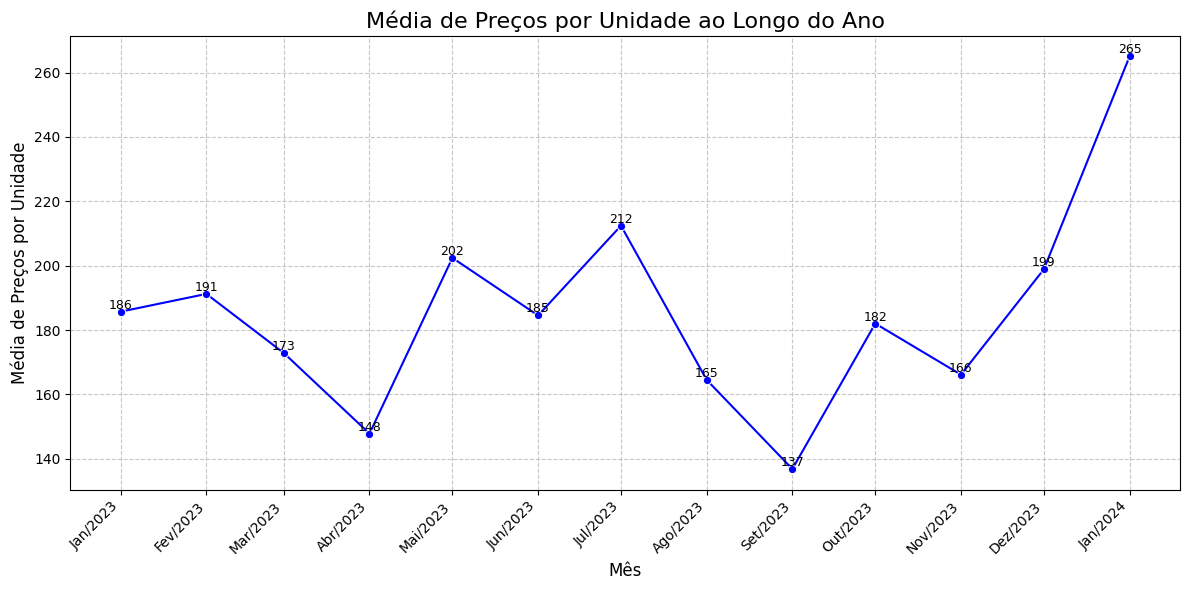

In [22]:
# Garante que a coluna 'Date' esteja no formato datetime
vd['Date'] = pd.to_datetime(vd['Date'])

# Extrai o mês e o ano para agregação - captura a data na frequência mensal e armazena na coluna YearMonth
vd['YearMonth'] = vd['Date'].dt.to_period('M')

# Calcula a média do preço por unidade para cada mês
average_price_per_month = vd.groupby('YearMonth')['Price per Unit'].mean().reset_index()

# Converte 'YearMonth' de volta para timestamp para fins de plotagem
average_price_per_month['YearMonth'] = average_price_per_month['YearMonth'].dt.to_timestamp()

# Cria o gráfico de linhas
plt.figure(figsize=(12, 6))
sns.lineplot(x='YearMonth', y='Price per Unit', data=average_price_per_month, marker='o', color='blue')

# Adicionando os valores sobre cada ponto
for index, row in average_price_per_month.iterrows():
    plt.text(
        x=row['YearMonth'], # Posição X do texto (a data do mês)
        y=row['Price per Unit'], # Posição Y do texto (o valor da média)
        s=f'{row["Price per Unit"]:.0f}', # O texto a ser exibido (valor formatado com 0 casas decimais)
        ha='center', # Alinhamento horizontal: centralizado no ponto
        va='bottom', # Alinhamento vertical: abaixo do ponto (para ficar acima do marker 'o')
        fontsize=9, # Tamanho da fonte do texto
        color='black' # Cor do texto
    )

# Formatando o Eixo X
ax = plt.gca() # Pega os eixos atuais

#Chamada da função para configurar o eixo X
configurar_eixo_x_datas(ax, formatar_mes)

# Chamada da função para adicionar títulos e rótulos
define_titulo_eixos('Média de Preços por Unidade ao Longo do Ano','Mês', 'Média de Preços por Unidade')

plt.grid(True, linestyle='--', alpha=0.7) # Adiciona grade ao gráfico
plt.xticks(rotation=45, ha='right') # Rotaciona os rótulos do eixo x para melhor legibilidade

# Chamada da função para imprimir e salvar o gráfico
finalizar_e_salvar_grafico("media_precos_por_mes_linha.png")

Observando a imagem acima percebemos que não houve uma uniformidade nos preços ao longo do ano de 2023, apresentando variações de preços desde 186 até 265 na cesta de produtos vendidos.
Como já abordado anteriormente, as vendas que foram realizadas em Jan/2024 serão tratadas mais a frente, na etapa de pré-processamento.

### Desvio Padrão

O desvio padrão é uma medida de dispersão que quantifica a quantidade de variação ou dispersão de um conjunto de valores. Um desvio padrão baixo indica que os pontos de dados tendem a estar próximos da média do conjunto, enquanto um desvio padrão alto indica que os pontos de dados estão espalhados por uma faixa maior de valores. Ele é a raiz quadrada da variância.

In [17]:
# desvio padrão dos atributos numéricos do dataset
vd.describe().loc['std']

,std
Sale Number,288.819436
Date,NaN
Age,13.68143
Quantity,1.132734
Price per Unit,189.681356
Total Amount,559.997632


Considerando que já temos um gráfico de linha para a média, utilizaremos o **Gráfico de Linha com Faixas de Erro** para exibir o desvio padrão de cada um dos meses.

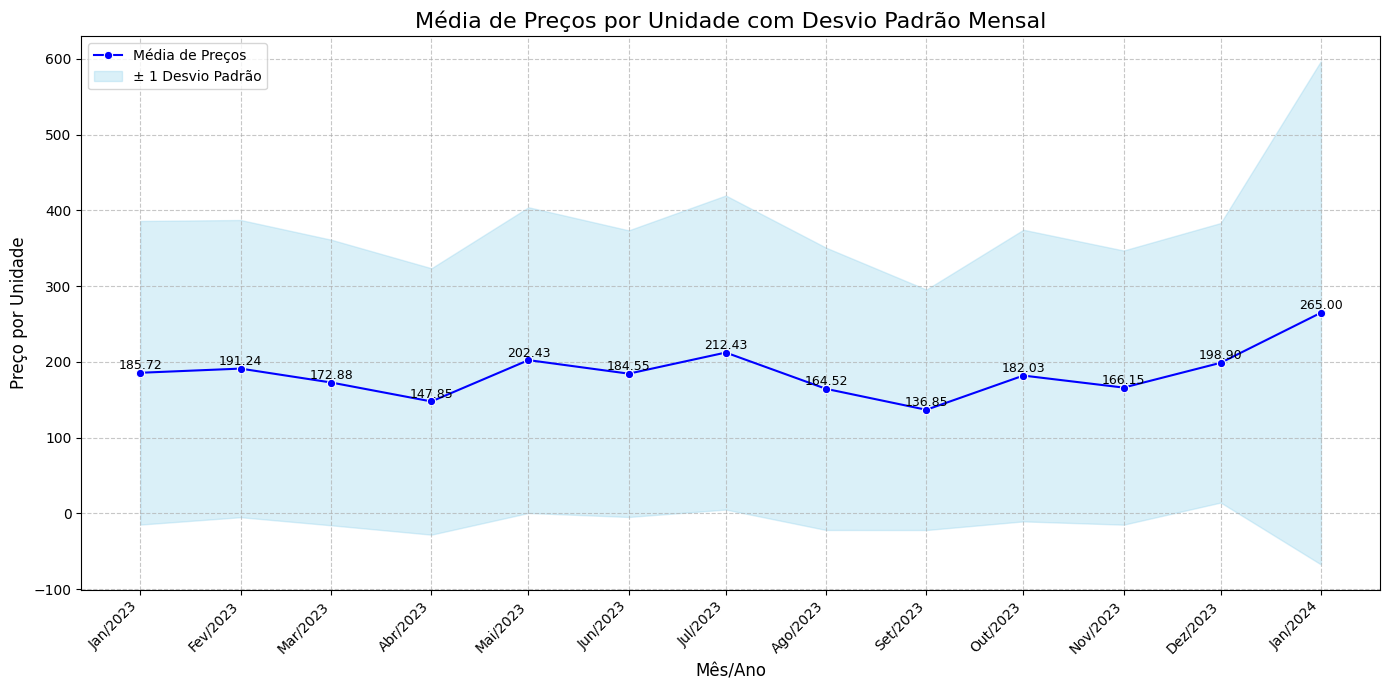

In [23]:
# Calcula a média E o desvio padrão do preço por unidade para cada mês
monthly_stats = vd.groupby('YearMonth')['Price per Unit'].agg(['mean', 'std']).reset_index()
monthly_stats.rename(columns={'mean': 'Average Price', 'std': 'Std Dev'}, inplace=True)

# Converte 'YearMonth' de volta para timestamp para fins de plotagem
monthly_stats['YearMonth'] = monthly_stats['YearMonth'].dt.to_timestamp()

# Cria o gráfico de linhas com faixas de erro
plt.figure(figsize=(14, 7)) # Aumenta um pouco o tamanho para melhor visualização

# Média dos preços
sns.lineplot(
    x='YearMonth',
    y='Average Price',
    data=monthly_stats,
    marker='o',
    color='blue',
    label='Média de Preços'
)

# Adicionando as faixas de erro
# Calculando as bandas superior e inferior: Média +/- Desvio Padrão
# Utilizando .fillna(0) para o caso de algum mês não ter desvio padrão
monthly_stats['Upper Band'] = monthly_stats['Average Price'] + monthly_stats['Std Dev'].fillna(0)
monthly_stats['Lower Band'] = monthly_stats['Average Price'] - monthly_stats['Std Dev'].fillna(0)

plt.fill_between(
    x=monthly_stats['YearMonth'],
    y1=monthly_stats['Lower Band'],
    y2=monthly_stats['Upper Band'],
    color='skyblue', # Cor da área sombreada
    alpha=0.3,       # Transparência da área sombreada
    label='± 1 Desvio Padrão'
)

# Adicionando os valores da média sobre cada ponto
for index, row in monthly_stats.iterrows():
    # Verifica se o desvio padrão não é NaN antes de tentar formatar
    std_dev_text = f'±{row["Std Dev"]:.2f}' if pd.notna(row["Std Dev"]) else ''

    # Exibe a média no ponto
    plt.text(
        x=row['YearMonth'],
        y=row['Average Price'] + 0.5, # Ajusta a posição Y para o texto da média ficar um pouco acima
        s=f'{row["Average Price"]:.2f}',
        ha='center',
        va='bottom',
        fontsize=9,
        color='black'
    )

# Formatando o Eixo X
ax = plt.gca() # Pega os eixos atuais

#Chamada da função para configurar o eixo X
configurar_eixo_x_datas(ax, formatar_mes)

# Chamada da função para adicionar títulos e rótulos
define_titulo_eixos('Média de Preços por Unidade com Desvio Padrão Mensal', 'Mês/Ano', 'Preço por Unidade')

plt.grid(True, linestyle='--', alpha=0.7) # Adiciona grade ao gráfico
plt.xticks(rotation=45, ha='right') # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.legend() # Mostra a legenda para identificar a linha e a faixa

# Chamada da função para imprimir e salvar o gráfico
finalizar_e_salvar_grafico("desvio_padrao_precos_por_mes_linha.png")

Observe que o gráfico acima indica que os preços estão espalhados por uma ampla faixa de valores, longe da média. Isso sugere inicialmente que há uma grande variabilidade nos preços praticados.

# Análise das Hipóteses

A distribuição de dados descreve como os valores de uma variável se espalham, ou seja, a frequência com que diferentes valores ocorrem. Entender a distribuição é crucial na análise de dados, pois revela padrões, tendências centrais, dispersão e a presença de valores atípicos (outliers). Para visualizar e interpretar essas distribuições, utilizaremos ferramentas visuais fundamentais para representar essa distribuição, como o histograma, o barpot e o bloxplot.

Essas visualizações serão cruciais para nos auxiliar na validação de cada uma das hipóteses propostas, permitindo-nos observar se os dados se comportam de forma simétrica ou assimétrica, se possuem um único pico (unimodal) ou múltiplos picos (multimodal), e se existem anomalias que precisam ser investigadas.

### *Hipótese 1: Evolução mensal de gastos por gênero*

Como ocorre a sazonalidade de compras entre os gêneros?
Para entender esse comportamento, vamos analisar a evolução mensal de gastos (Quantidade Total) por gênero.

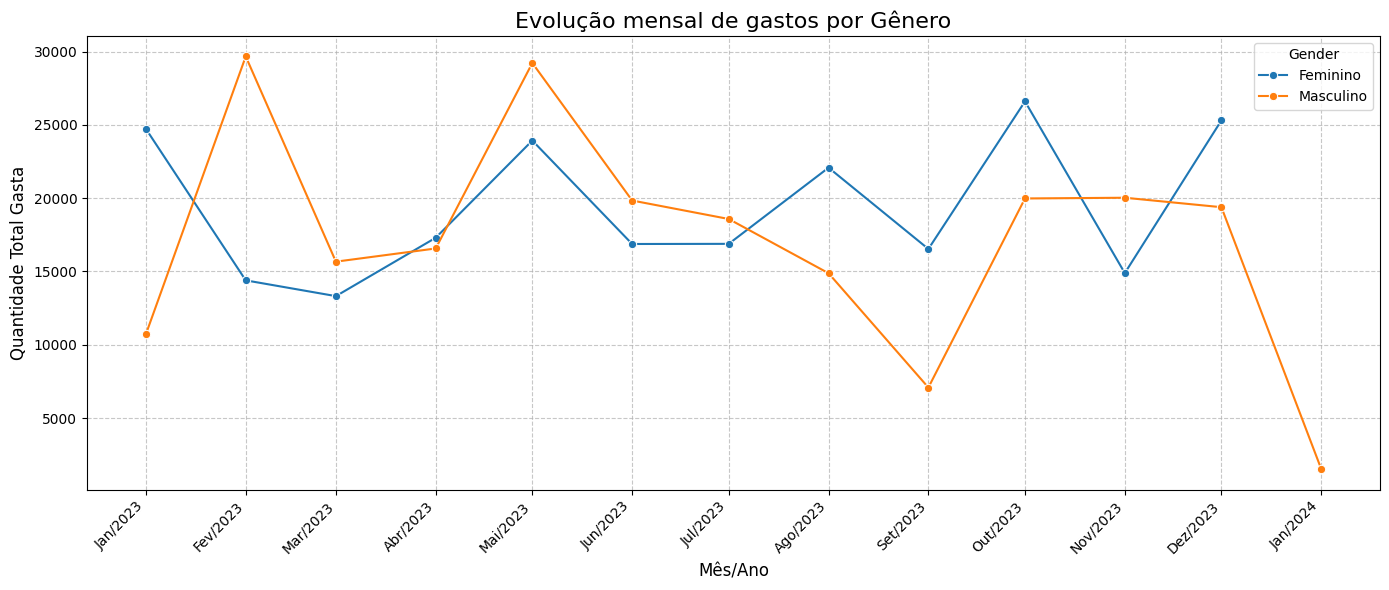

In [24]:
# Criando colunas auxiliares
vd['AnoMes'] = vd['Date'].dt.to_period('M')

# Capturando as faixas etárias definidas inicialmente
vd['Faixa_Etaria'] = pd.cut(vd['Age'], bins=bins, labels=labels, right=False)

# Garantindo tipo numérico
vd['Quantidade total'] = pd.to_numeric(vd['Total Amount'], errors='coerce')

# Agrupando por mês e gênero
vd_mensal = vd.groupby(['AnoMes', 'Gender'])['Quantidade total'].sum().reset_index()
vd_mensal['AnoMes'] = vd_mensal['AnoMes'].dt.to_timestamp() #Converte para timestamp

# Criando o gráfico de linhas
plt.figure(figsize=(14,6))
sns.lineplot(data=vd_mensal, x='AnoMes', y='Quantidade total', hue='Gender', marker='o')

# Formatando o Eixo X
ax = plt.gca()

# Chamada da função para configurar o eixo X
configurar_eixo_x_datas(ax, formatar_mes)

# Chamada da função para adicionar títulos e rótulos
define_titulo_eixos('Evolução mensal de gastos por Gênero', 'Mês/Ano', 'Quantidade Total Gasta')

plt.grid(True, linestyle='--', alpha=0.7) # Adiciona grade ao gráfico
plt.xticks(rotation=45)

# Chamada da função para imprimir e salvar o gráfico
finalizar_e_salvar_grafico('evolucao_mensal_genero.png')

Ao analisar o volume de compras ao longo do ano, notamos uma interessante **sazonalidade** que difere entre os gêneros:

*   No **primeiro semestre**, há um claro aumento no volume de compras por parte das **mulheres**.
*   Já no **segundo semestre**, são os **homens** que assumem a liderança nesse ranking de compras da cesta de produtos do dataset.

Apesar dessa inversão de liderança entre os semestres, é importante ressaltar que, de forma geral, a **sazonalidade nas compras não apresenta uma diferença tão acentuada entre os gêneros**. Ou seja, ambos os grupos seguem padrões de compra anuais que, embora com picos em momentos distintos, não divergem drasticamente em termos de intensidade geral.

### *Hipótese 2: Variação do ticket médio entre as faixas etárias*

O ticket médio por compras varia entre as faixas etárias? Para isso, vamos analisar a média de quantidade total por transação por faixa etária. Para isso, trouxemos um barplot para mostrar a média do ticket para cada faixa.


Adicionalmente, incluímos um histplot da coluna ticket médio de compras para visualizarmos a distribuição geral dos tickets médios de todas as compras.

 O histplot é fundamental para ter uma primeira ideia sobre como os dados estão "espalhados" e onde a maioria deles se concentra. Ele complementa a análise do ticket médio por faixa etária, pois mostra a visão micro de cada compra, enquanto o barplot (gráfico de barras) mostra a visão macro por grupo de idade.

#### **Barplot** - Ticket Médio por Faixa Etária

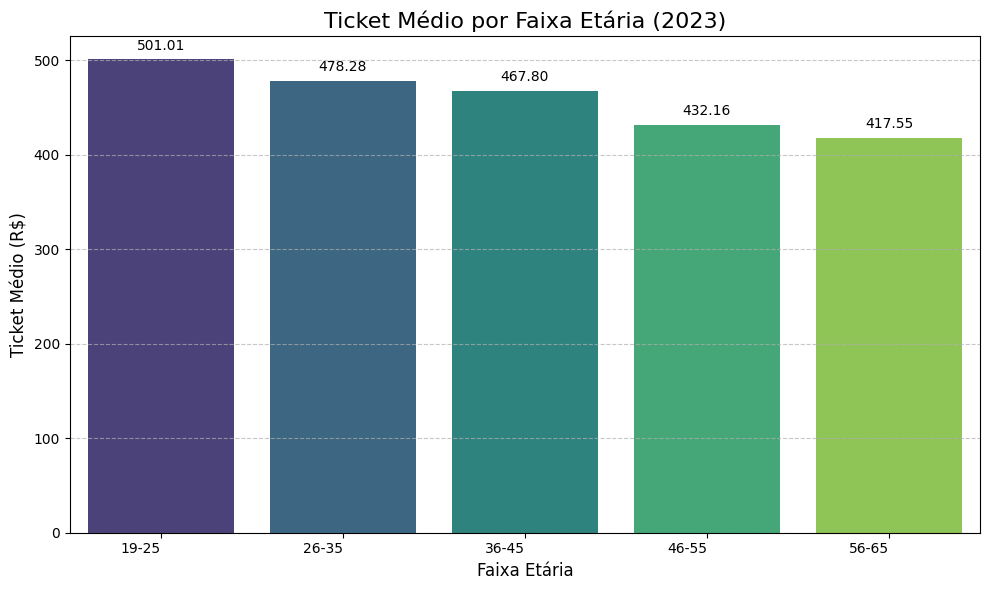

In [25]:
# Calculando o Ticket Médio por Compra
vd['ticket_medio_compra'] = vd['Total Amount']

# Capturando as Faixas Etárias definidas inicialmente
vd['faixa_etaria'] = pd.cut(vd['Age'], bins=bins, labels=labels, right=False)

# Calculando o Ticket Médio por Faixa Etária
# Agrupamos por 'faixa_etaria' e calculamos a média do 'ticket_medio_compra'
ticket_medio_por_faixa_etaria = vd.groupby('faixa_etaria', observed=True)['ticket_medio_compra'].mean().reset_index()
ticket_medio_por_faixa_etaria.rename(columns={'ticket_medio_compra': 'ticket_medio_agrupado'}, inplace=True)

# Gerando o Histograma
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='faixa_etaria', y='ticket_medio_agrupado', data=ticket_medio_por_faixa_etaria,
        palette='viridis', hue='faixa_etaria', legend=False)

# Chamada da função para adicionar títulos e rótulos
define_titulo_eixos('Ticket Médio por Faixa Etária (2023)', 'Faixa Etária', 'Ticket Médio (R$)')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0, ha='right') # Rotaciona os rótulos do eixo X para melhor visualização

# Adicionar os valores nas barras
for p in ax.patches: # 'patches' são as barras do gráfico
    # Anota o valor no topo de cada barra
    ax.annotate(f'{p.get_height():.2f}', # Formata o valor com 2 casas decimais
                (p.get_x() + p.get_width() / 2., p.get_height()), # Posição (x, y) do texto
                ha='center', va='center', # Alinhamento horizontal e vertical
                xytext=(0, 10), # Deslocamento do texto (10 pontos acima da barra)
                textcoords='offset points') # Unidade do deslocamento

# Chamada da função para imprimir e salvar o gráfico
finalizar_e_salvar_grafico('ticket_medio_FaixaEtaria_Barplot.png')

Neste gráfico, cada barra nos apresenta o **ticket médio de compras** para cada faixa etária. Isso nos permite comparar rapidamente o poder de compra médio entre os diferentes grupos de idade, identificando de imediato quais faixas etárias têm o maior ou o menor gasto médio por compra.

Pelo visual, observamos uma tendência clara: o ticket médio de compras** decresce à medida que as faixas etárias diminuem**. Ou seja, clientes mais velhos tendem a gastar menos por compra. Com base nisso, uma estratégia de vendas promissora poderia ser o desenvolvimento de **campanhas de marketing focadas no público com idades entre 56 e 65 anos**, pois demonstram o menor ticket médio.

É importante notar, contudo, que este gráfico nos oferece apenas uma visão geral da média. Ele **não revela a distribuição interna dos tickets médios dentro de cada faixa etária**. Isso significa que, embora saibamos a média, não conseguimos identificar se os gastos individuais dentro de um grupo são consistentes em torno dessa média ou se há uma grande variação (com alguns clientes gastando muito e outros muito pouco). Detalhes sobre essa distribuição e a dispersão dos dados serão explorados no Box Plot que apresentaremos a frente.

#### **Histograma** - Ticket Médio por Compra com Frequência

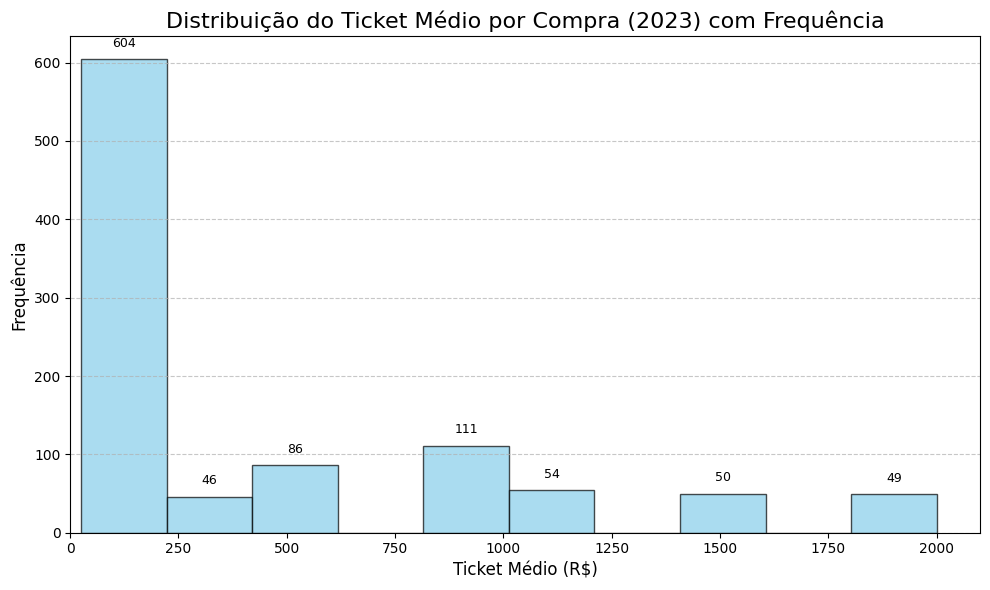

In [26]:
# Histograma da distribuição dos próprios tickets médios:
plt.figure(figsize=(10, 6))

# Calculando o valor mínimo e máximo do ticket médio para definir os bins e o xlim
min_ticket = vd['ticket_medio_compra'].min()
max_ticket = vd['ticket_medio_compra'].max()

# Para garantir que o limite inferior do eixo X comece em 0 ou no menor valor real
x_min_display = max(0, min_ticket - (max_ticket * 0.05)) # Começa em 0 ou um pouco antes do mínimo real, o que for maior
x_max_display = max_ticket + (max_ticket * 0.05) # Vai um pouco além do máximo real

# Usamos plt.hist para obter as contagens e os bins
n, bins_list_hist, patches = plt.hist(vd['ticket_medio_compra'], bins=num_bins, color='skyblue', edgecolor='black', alpha=0.7)

# Chamada da função para adicionar títulos e rótulos
define_titulo_eixos('Distribuição do Ticket Médio por Compra (2023) com Frequência', 'Ticket Médio (R$)', 'Frequência')

plt.grid(axis='y', linestyle='--', alpha=0.7)

# Definir os limites do eixo X usando plt.xlim() - define os limites do eixo x do gráfico
plt.xlim(x_min_display, x_max_display)

# Adicionar os valores nas barras do histograma
for i in range(len(patches)):
    patch = patches[i]
    height = patch.get_height()

    if height > 0: # Para evitar adicionar texto em barras vazias
             # Adiciona o texto no topo de cada barra
             plt.text(patch.get_x() + patch.get_width() / 2, # Posição X (centro da barra)
             height + (max(n) * 0.02), # Posição Y (um pouco acima da barra, ajustando para a escala)
             f'{int(height)}', # O valor (contagem) formatado como inteiro
             ha='center', va='bottom', # Alinhamento
             fontsize=9, color='black')

# Chamada da função para imprimir e salvar o gráfico
finalizar_e_salvar_grafico('ticket_medio_porcompra_Histograma.png')

O histograma em questão nos fornece insights valiosos sobre a distribuição do ticket médio das compras:


*   A **maior frequência de compras** está claramente concentrada em **tickets médios entre R$ 0 e R$ 250,00**. Isso significa que a vasta maioria das transações envolve um gasto relativamente baixo.
*   Consequentemente, tickets médios mais elevados exibem **frequências muito baixas e pontuais**, indicando que compras de alto valor são menos comuns.

Essa concentração em valores baixos sugere que, possivelmente, a estratégia de vendas atual esteja mais focada em **produtos de menor valor ou em promoções**, incentivando um volume maior de transações de baixo custo.

É interessante notar também a presença de **tickets médios mais altos na última barra** do histograma. Embora representem uma frequência baixa, esses pontos correspondem aos **maiores valores de tickets de compras** registrados, indicando transações de maior impacto financeiro, ainda que menos frequentes.

#### **Boxplot** - Estatística Descritivas por Faixa Etária

Para entender as diferenças entre os tickets médios, devemos olhar como se comportam os valores quando agrupadas por idade. Isso nos permite comparar a média, mediana e desvio padrão de cada faixa etária, além de visualizar suas distribuições por meio de boxplots.


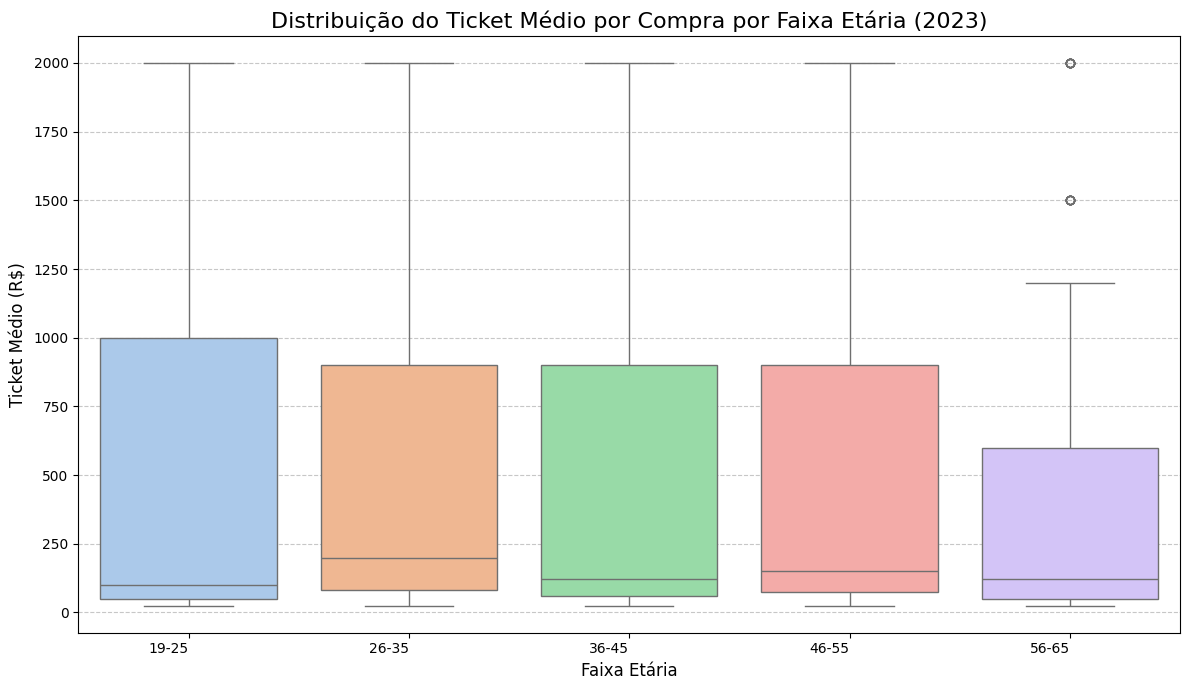

In [27]:
# Boxplot para visualizar a distribuição do ticket médio por faixa etária
plt.figure(figsize=(12, 7))
sns.boxplot(x='faixa_etaria', y='ticket_medio_compra', data=vd, palette='pastel',
            hue='faixa_etaria', legend=False, order=labels)

# Chamada da função para adicionar títulos e rótulos
define_titulo_eixos('Distribuição do Ticket Médio por Compra por Faixa Etária (2023)', 'Faixa Etária','Ticket Médio (R$)')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0, ha='right')

# Chamada da função para imprimir e salvar o gráfico
finalizar_e_salvar_grafico('ticket_medio_FaixaEtaria_Boxplot.png')

O gráfico Box Plot é uma ferramenta poderosa para visualizarmos as **principais estatísticas descritivas do ticket médio** de compras realizadas ao longo do ano de 2023 por faixa etária. Com ele, conseguimos facilmente capturar informações cruciais sobre **a distribuição e a variabilidade** de cada grupo etário. Isso nos permite compreender a dispersão, a simetria e a presença de outliers em cada categoria, além de facilitar a comparação dessas características entre os grupos.

Para o dataset em estudo percebemos que as **medianas de todas as faixas etárias** encontram-se mais p**róximas da borda inferior da caixa**, indicando portanto uma **distribuição assimétrica positiva**, ou "assimetria à direita", significando que há mais valores menores e alguns valores maiores puxando a cauda para a direita. Essa observação **reforça o que já havíamos notado no Histograma**, onde a maior frequência (604 ocorrências) estava concentrada em tickets médios abaixo de R$ 250,00.

Vemos também de a fixa etária de **19 a 25 anos** apresenta uma **alta variabilidade** de ticket médio, uma vez que apresenta uma **caixa longa**, com 50% dos dados centrais mais espalhados.

Em contrapartida, a faixa etária entre **56 e 65 anos** apresenta **baixa variabilidade** de ticket médio, uma vez que apresenta uma **caixa curta**, mostrando que 50% dos dados centrais estão mais concentrados, o que sugere uma consistência maior nos gastos desse público.

Há ainda, para a mesma faixa etária (**56-65**), a presença de **outliers**, o que indicam **clientes específicos **que tiveram **tickets de compra excepcionalmente altos** para esta faixa etária.

Essa análise do Box Plot complementa a visão do Histograma, oferecendo uma compreensão mais profunda sobre a dispersão e os comportamentos de compra dentro de cada grupo etário. Isso pode ser muito útil para refinar estratégias de marketing e vendas.

Dessa forma, ao longo da análise, examinamos o comportamento de compra de cada faixa etária no dataset sob diversas perspectivas. Incluímos a **frequência de compras** dentro de cada faixa e investigamos a **variação do ticket médio** entre os diferentes grupos de idade. Nosso objetivo foi compreender profundamente como os padrões de compra se manifestam e se modificam conforme a faixa etária.

### *Hipótese 3: Análise da correlação entre a época da compra e a faixa etária o consumidor*

Para investigar a existência de uma correlação entre a época da compra (dia da semana) e a faixa etária do consumidor dentro de uma semana, observamos inicialmente que estamos lidando com dois tipos de variáveis: o dia da semana, que pode ser tratado como uma variável categórica ordinal (seguindo uma sequência lógica de segunda a domingo), e a faixa etária, que também é uma variável categórica ordinal com uma ordem intrínseca definida (como 19-25, 26-35, etc.).

Dado que ambas são variáveis ordinais, e a relação entre elas pode não ser estritamente linear, utilizaremos a correlação de Spearman. Esse método é ideal para avaliar a força e a direção da associação monotônica entre duas variáveis quando pelo menos uma delas é ordinal. Além disso, para visualizar os padrões de compras semanais de cada faixa etária de forma detalhada, utilizaremos um heatmap e uma matriz de correlação para analisar como os comportamentos de gasto dos diferentes grupos etários se relacionam ao longo da semana.

#### **Mapa de Calor** - Total de compras por dia da semana e Faixa Etária

O Mapa de Calor "Total de Compras por Dia da Semana e Faixa Etária" mostra claramente onde cada grupo de idade concentra seus gastos semanais.

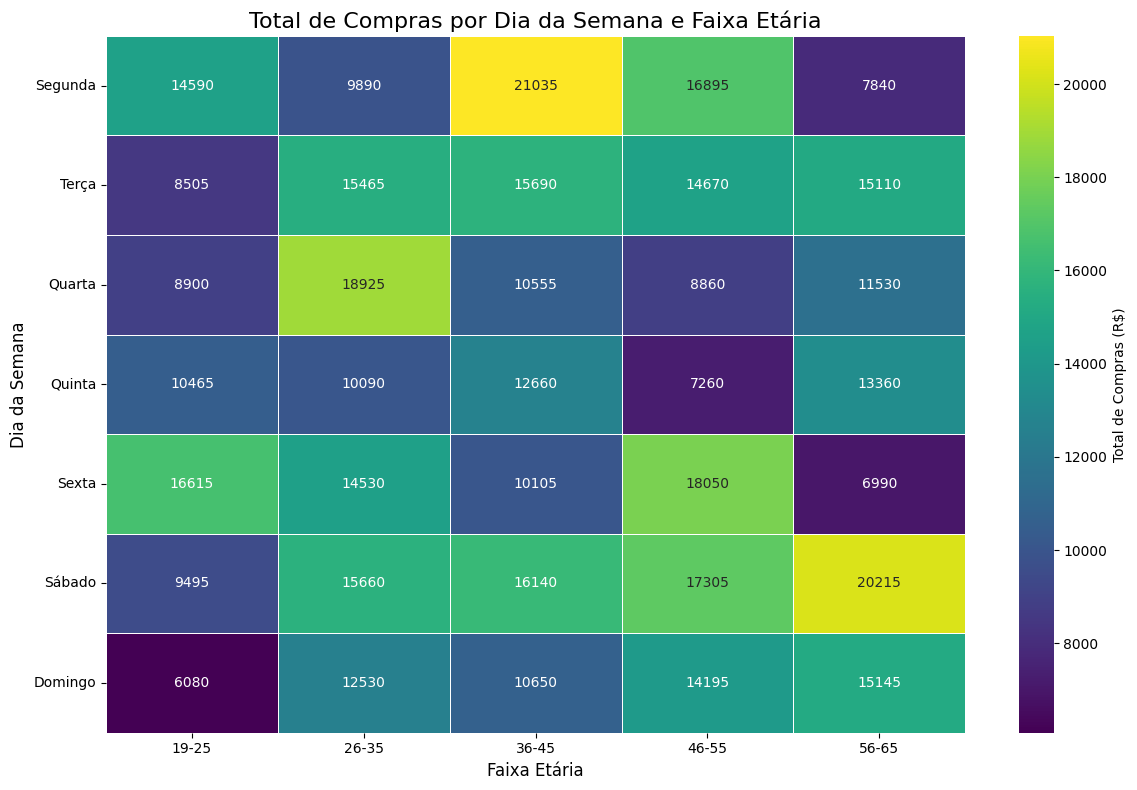

In [28]:
# Garante que 'Date' é datetime
vd['Date'] = pd.to_datetime(vd['Date'])

# Criando a coluna para o dia da semana (0=Segunda, 6=Domingo)
vd['DayOfWeek'] = vd['Date'].dt.dayofweek

vd['DayOfWeekName'] = vd['DayOfWeek'].map(day_names)

# Capturando as Faixas Etárias
vd['faixa_etaria'] = pd.cut(vd['Age'], bins=bins, labels=labels, right=False, ordered=True)

# Garante a ordem das faixas etárias
vd['faixa_etaria'] = vd['faixa_etaria'].astype('category').cat.reorder_categories(labels, ordered=True)

# Agrupando os dados para obter o total de compras por Dia da Semana e Faixa Etária
total_compras_por_dia_semana_faixa = vd.groupby(['DayOfWeekName', 'faixa_etaria'], observed=True)['Total Amount'].sum().unstack(fill_value=0)

# Reordena o índice para que os dias da semana apareçam na ordem correta no heatmap
# Usamos os valores do dicionário day_names para garantir a ordem correta
ordem_dias = list(day_names.values())
total_compras_por_dia_semana_faixa = total_compras_por_dia_semana_faixa.reindex(ordem_dias)

plt.figure(figsize=(12, 8))
sns.heatmap(total_compras_por_dia_semana_faixa,
            cmap='viridis', # Um mapa de cores diferente para variedade
            annot=True,
            fmt='.0f',
            linewidths=.5,
            cbar_kws={'label': 'Total de Compras (R$)'})

# Chamada da função para adicionar títulos e rótulos
define_titulo_eixos('Total de Compras por Dia da Semana e Faixa Etária', 'Faixa Etária', 'Dia da Semana')

plt.yticks(rotation=0)

# Chamada da função para imprimir e salvar o gráfico
finalizar_e_salvar_grafico('heatmap_dia_semana_faixa_etaria.png')

Ao analisar o mapa conseguimos identificar alguns padrões:

Os Jovens, com faixa etária entre **19 e 25 anos**, têm um **pico de compras** notável na **Sexta-feira** (R$ 16.420) e na **Segunda-feira** (R$ 14.590). **Compras mais baixas** no fim de semana, especialmente no **Domingo** (R$ 6.080). Isso pode indicar compras para atividades de lazer no fim de semana ou preparação para a semana de trabalho/estudo.

Já os Jovens Adultos, com faixa etária entre **26 e 35 anos**, apresentam **gastos mais altos** na **Quarta-feira** (R$ 18.425), **Sábado** (R$ 15.660) e **Terça-feira** (R$ 15.465). São mais distribuídos ao longo da semana, mas com picos claros no meio da semana e no sábado.

Os Adultos (**36-45**) apresentam um **pico de compras** muito forte na **Segunda-feira** (R$ 21.035), indicando que talvez usem o início da semana para compras ou tarefas. Os gastos caem consideravelmente na Sexta-feira.

Analogamente, as faixas de Meia-idade (**46-55**) **concentram suas compras na Sexta-feira** (R$ 18.050) e **Sábado** (R$ 17.305), o que sugere que usam o fim de semana para compras mais substanciais ou de lazer.

Por fim, os mais Velhos, que compreendem a faixa entre **56 e 65 anos** no nosso contexto **preferem** o **Sábado** (R$ 19.185) e o **Domingo** (R$ 15.055) **para suas compras**, mostrando uma forte tendência para o fim de semana.


#### **Matriz de Correlação**

Utiliremos a Matriz de Correlação para apresentarmos os padrões de compras semanais por faixa etária.

A matriz de correlação mede a força e a direção de uma relação linear que os atributos numéricos das espécies podem ter. Valores próximos a 1 indicam uma forte correlação positiva, -1 uma forte correlação negativa, e 0 ausência de correlação linear.

Esta matriz nos mostra como os padrões de gastos de uma faixa etária se movem em sincronia com os de outra ao longo da semana.

In [ ]:
print("\n--- Matriz de Correlação dos Padrões de Compra Semanais por Faixa Etária ---")
display(total_compras_por_dia_semana_faixa.corr())


--- Matriz de Correlação dos Padrões de Compra Semanais por Faixa Etária ---


faixa_etaria,19-25,26-35,36-45,46-55,56-65
faixa_etaria,,,,,
19-25,1.000000,-0.242947,0.126743,0.489056,-0.785655
26-35,-0.242947,1.000000,-0.399290,0.034255,0.233963
36-45,0.126743,-0.399290,1.000000,0.279407,-0.007097
46-55,0.489056,0.034255,0.279407,1.000000,-0.135511
56-65,-0.785655,0.233963,-0.007097,-0.135511,1.000000


Através da Matriz de Correlação constatamos que:

*  **19-25 vs. 56-65 (Correlação Forte Negativa: -0.785655):** Esta é a correlação mais forte e negativa. Indica que as faixas etárias mais jovens e mais velhas têm padrões de compra semanais opostos. Quando os jovens (19-25) gastam mais (Sexta/Segunda), os mais velhos (56-65) tendem a gastar menos, e vice-versa (mais no Sábado/Domingo). Esta pode ser uma descoberta importante para estratégias de marketing.

*   **19-25 vs. 46-55 (Correlação Moderada Positiva: 0.489056):** Há uma correlação positiva moderada, sugerindo que ambas as faixas etárias (jovens e meia-idade) tendem a aumentar ou diminuir suas compras em alguns dos mesmos dias da semana, notavelmente na Sexta-feira.

*   **26-35 vs. 36-45 (Correlação Moderada Negativa: -0.399290):** Existe uma correlação negativa moderada, indicando que os padrões de compra semanais dessas duas faixas etárias tendem a ser um pouco opostos. Por exemplo, 26-35 tem pico na Quarta, enquanto 36-45 tem pico na Segunda e um vale na Sexta.

*   **Outras Correlações:** As demais correlações são fracas (próximas de zero), o que significa que não há uma relação linear clara entre os padrões de compra semanais dessas faixas etárias.

#### **Correlação de Spearman**

A Correlação de Spearman é uma medida estatística não paramétrica que avalia a força e a direção da associação monotônica entre duas variáveis. Ela verifica se, à medida que os valores de uma variável aumentam, os valores da outra variável também tendem a aumentar (correlação positiva), a diminuir (correlação negativa) ou se não há uma tendência consistente (ausência de correlação).

Diferente da Correlação de Pearson (que mede relações lineares e exige que as variáveis sejam contínuas e tenham distribuição normal), a Spearman é baseada nos postos (ranks) das observações, e não nos valores brutos. É ideal para Variáveis Ordinais, como a faixa etária ou o dia da semana (quando codificado numericamente), onde a ordem importa, mas a diferença exata entre os valores não é tão significativa.

In [ ]:
# Certificando-se de que a coluna de código da faixa etária ainda existe
if 'faixa_etaria_codigo' not in vd.columns:
    vd['faixa_etaria_codigo'] = vd['faixa_etaria'].cat.codes

spearman_corr_weekly = vd['DayOfWeek'].corr(vd['faixa_etaria_codigo'], method='spearman')
print(f"\n Correlação de Spearman entre Dia da Semana e Faixa Etária: {spearman_corr_weekly:.4f}")


 Correlação de Spearman entre Dia da Semana e Faixa Etária: 0.0117


Observamos portanto uma **fraca Correlação de Spearman Geral**, considerando seu valor próximo de zero indicando que **não há uma tendência** consistente de **faixas etárias específicas** (mais jovens ou mais velhas) **comprarem em dias específicos da semana** em uma escala contínua (ex: mais velhos comprando consistentemente no final da semana, etc.).

**Embora a correlação** geral de Spearman entre o dia da semana (como uma variável ordinal) e a faixa etária **possa ser fraca**, a análise detalhada dos padrões de compra e das correlações entre as próprias faixas etárias ao longo da semana apresenta conclusões importantes. Ela demonstra que **o dia da semana** é um fator crucial que **influencia** de maneira distinta **o comportamento de compra de diferentes gerações**, abrindo portas para estratégias de marketing e operações mais segmentadas e eficazes. Por exemplo, campanhas promocionais podem ser ajustadas para atingir faixas etárias específicas nos dias da semana em que são mais ativas.

#### **Uma breve Análise Estratégica**

As análises realizadas apresentam Padrões Semanais Relevantes o que pode ser útil para o planejamento estratégico de uma empresa, se tivermos analisando, por exemplo, as vendas dentro de uma empresa especificamente.

No aspecto comportamental, as Faixas etárias mais jovens (19-25) e mais velhas (56-65) demonstram comportamentos de compra semanais contrastantes. Os jovens preferem o início da semana e sextas-feiras, enquanto os mais velhos concentram-se no fim de semana.

Quanto ao segmento de marketing, seria possível:

*   Focar promoções para 19-25 anos nas Segundas e Sextas;
*   Direcionar campanhas para 56-65 anos no Sábado e Domingo;
*   Observe que as faixas 26-35 e 36-45 têm picos em dias úteis e início/meio de semana, respectivamente.

A correlação negativa forte entre 19-25 e 56-65 significa que o que funciona para um grupo pode não funcionar para o outro no mesmo dia da semana. Estratégias que visam ambos os públicos no mesmo dia podem ser contraproducentes se os produtos ou abordagens não forem distintos.

Dessa forma, verificamos que existe uma correlação clara e útil entre a época da compra (neste caso, o dia da semana) e a faixa etária do consumidor, com padrões distintos e correlações significativas entre os grupos.

# Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

Nesse trabalho, buscamos **prever o valor total gasto em uma transação, ou seja, prever a quantidade total vendida**.

Selecionamos portanto como target o atributo "Quantidade Total". Trata-se de uma variável numérica contínua, representando o valor total em dinheiro gasto em uma transação.

E as features que podem influenciar a Quantidade Total:

*   **Gênero:** Trata-se de uma variável categórica que pode influenciar o gasto. Precisará de One-Hot Encoding (se houver uma ordem intrínseca) para o pré-processamento de Features neste cenário.
*   **Idade:** Variável numérica que também pode influenciar o gasto (jovens vs. idosos). Realizaremos a padronização para essa feature, que será explicada mais a frente.
*   **Categoria do Produto:** Variável categórica. O tipo de produto comprado afetará o valor total da transação.
*   **Data:** Será transformada nas features 'Dia da Semana', 'Mês' e 'Dia do Mês' para capturar a sazonalidade ou tendências temporais que influenciam o gasto. Essas novas features serão numéricas.

As features 'Quantidade' e 'Preço Unitário' foram excluídas considerando serem um resultado direto do target, podendo futuramente influenciar o modelo e gerar vazamento de dados.


## Tratamento de Valores Nulos ou ausentes

O dataset Sales possui valores nulos para uma variável quantitativa (Age) e uma variável categórica (Gender), como demonstrado abaixo. O tratamento de valores nulos será realizado com imputação (preenchimento com a mediana e com 'Não informado').

In [29]:
print("--- Verificando valores ausentes ---")
# Verificando se há dados faltando nas colunas específicas
colunas_para_verificar = ['Date', 'Gender', 'Age', 'Product Category', 'Quantity', 'Price per Unit', 'Total Amount']

print("Contagem de valores ausentes por coluna:")
display(vd[colunas_para_verificar].isnull().sum())

print("\nPercentual de valores ausentes por coluna:")
display(vd[colunas_para_verificar].isnull().sum() / len(vd) * 100)

--- Verificando valores ausentes ---
Contagem de valores ausentes por coluna:


,0
Date,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0



Percentual de valores ausentes por coluna:


,0
Date,0.0
Gender,0.0
Age,0.0
Product Category,0.0
Quantity,0.0
Price per Unit,0.0
Total Amount,0.0


**Estratégia utilizada para a variável Age**

Para corrigir a variável quantitativa ausente no dataset (Age) utilizaremos uma técnica de preenchimento incluindo a média de idade (Imputação).

In [30]:
# Para a coluna Idade (numérica):
#   - Preenchendo com a mediana

print("\nDataFrame após preencher valores ausentes em colunas numéricas:")
vd_imputed_numeric = vd.copy() # Crie uma cópia para não alterar o original

# Preencher 'Age' com a mediana
median_age = vd_imputed_numeric['Age'].median()
vd_imputed_numeric['Age'] = vd_imputed_numeric['Age'].fillna(median_age)
print(f"Idade preenchida com mediana: {median_age}")


DataFrame após preencher valores ausentes em colunas numéricas:
Idade preenchida com mediana: 42.0


**Estratégia utilizada para a variável Gender**

Para corrigir a variável categórica ausente no dataset (Gênero/Gender) preencheremos o campo com o dado "Não informado".

In [35]:
# Para a coluna Gênero (categórica):
#    - Preenchendo com 'Não informado'.

print("\nDataFrame após preencher valores ausentes na coluna categórica 'Gender':")
vd_imputed_categorical = vd.copy()

# Preenchendo 'Gender' com 'Não informado'
vd_imputed_categorical['Gender'] = vd_imputed_categorical['Gender'].fillna(empty_genero)
print(f"Gênero preenchido com: {empty_genero}")

print("\nContagem de valores ausentes em 'gênero' após imputação:")
print(vd_imputed_categorical['Gender'].isnull().sum())


DataFrame após preencher valores ausentes na coluna categórica 'Gender':
Gênero preenchido com: Não informado

Contagem de valores ausentes em 'gênero' após imputação:
0


In [36]:
# DataFrame final após a imputação
print("\nDataFrame com todas as colunas especificadas tratadas (imputação):")
vd_cleaned = vd.copy()
vd_cleaned['Age'] = vd_cleaned['Age'].fillna(vd_cleaned['Age'].median())

vd_cleaned['Gender'] = vd_cleaned['Gender'].fillna(empty_genero)

print(vd_cleaned[colunas_para_verificar].isnull().sum())


DataFrame com todas as colunas especificadas tratadas (imputação):
Date                0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


## Identificando se há alguma data fora do padrão

In [40]:
# Garantindo que a coluna 'data' está no formato datetime
vd['Date'] = pd.to_datetime(vd['Date'])

print("--- Verificando datas fora de 2023 ---")

# Identificando datas que NÃO são de 2023
# Criando a condição booleana
condicao_fora_2023 = vd['Date'].dt.year != 2023

# Usando a condição booleana diretamente no .loc do DataFrame original
if not vd[condicao_fora_2023].empty: # vd[condicao_fora_2023] para verificar se há registros
    print(f"\nForam encontrados {len(vd[condicao_fora_2023])} registros com datas fora do ano de 2023:")
    print(vd[condicao_fora_2023][['Date', 'Age', 'Gender']]) # Mostra os registros problemáticos

    # Acrescentando a substituição dos valores de data no DataFrame
    vd.loc[condicao_fora_2023, 'Date'] = pd.to_datetime('2023-12-31')
    print("\nDatas fora de 2023 substituídas por '2023-12-31' e coluna 'Date' original atualizada.")
else:
    print("\nTodas as datas no dataset são do ano de 2023. Nenhum registro fora do padrão encontrado.")

# Verificando novamente para confirmar a substituição
print("\n--- Verificação final de datas fora de 2023 após a correção ---")
datas_fora_2023_pos_correcao = vd[vd['data'].dt.year != 2023]
if datas_fora_2023_pos_correcao.empty:
    print("Todas as datas agora são do ano de 2023.")
else:
    print("Ainda há datas fora de 2023. Verifique o código.")
    print(datas_fora_2023_pos_correcao[['Date', 'Age', 'Gender']])


--- Verificando datas fora de 2023 ---

Todas as datas no dataset são do ano de 2023. Nenhum registro fora do padrão encontrado.

--- Verificação final de datas fora de 2023 após a correção ---
Ainda há datas fora de 2023. Verifique o código.
          Date  Age     Gender
210 2023-12-31   42  Masculino
649 2023-12-31   55  Masculino


## Engenharia de Features

A etapa de criação de novas características é absolutamente crucial no pipeline de machine learning e ciência de dados. É nela que transformamos os dados brutos em um formato que os modelos podem entender melhor e, mais importante, aprender com mais eficácia. Com ela é possível extrair mais informações de dados brutos, melhorando os dados do modelo.

Para este dataset, faremos a extração de componentes de data, como dia, mês e ano. Essa extração é fundamental pois enriquece os dados e permite que o modelo de machine learning capture padrões essenciais de sazonalidade e tendências de consumo.

In [41]:
# Engenharia de Features de Data - Criação de novas características (feature engineering)
vd['TransformDate'] = pd.to_datetime(vd['Date'])
vd['Day_of_week'] = vd['TransformDate'].dt.dayofweek # 0-6
vd['Month'] = vd['TransformDate'].dt.month
vd['Day_of_month'] = vd['TransformDate'].dt.day

## Definindo as Features (X) e Targets (y)

O Machine Learning Supervisionado (como a regressão para prever gastos neste caso) se baseia na ideia de que um modelo aprende a mapear entradas (features) para saídas desejadas (targets), usando exemplos onde a saída já é conhecida.

Features (X): São as variáveis independentes, os "ingredientes" que o modelo usará para fazer a previsão. Neste caso, são as colunas Gênero, Idade, Dia da Semana, Mês, Dia do Mês e Categoria do Produto.

Target (y): É a variável dependente, o que o modelo deve aprender a prever. Neste caso é o Total Gasto (ou Total Amount).

Sem essa distinção clara, o modelo não saberia o que ele deve aprender a prever a partir do quê.

In [45]:
# Removendo as colunas 'Quantidade', 'Preco_por_Unidade' e 'Date' original
X = vd[['Gender', 'Age', 'Product Category', 'Day_of_week', 'Month', 'Day_of_month']]

y = vd['Total Amount']


## Codificação de variáveis categóricas

Para a codificação das variáveis categóricas escolhemos utilizar o One-Hot Encoding. Este método cria novas colunas binárias para cada categoria.

A função get_dummies da biblioteca Pandas é usada para converter variáveis categóricas em variáveis dummy (ou indicadoras). realizando a operação de One-Hot Encoding (Codificação One-Hot) no DataFrame X (que contém as features).

Esta etapa é importante pois possibilita compatibilidade com Modelos de Machine Learning uma vez que a grande maioria dos algoritmos de machine learning não consegue trabalhar diretamente com dados textuais ou categóricos no seu formato original. Eles esperam números. Assim, o One-Hot Encoding converte essas categorias em um formato numérico binário que os modelos podem processar e aprender.

Além disso, cada categoria se torna uma feature independente. Ou seja, ao criar colunas binárias, cada categoria é representada de forma "isolada" e não hierárquica. Isso significa que o modelo não assume nenhuma ordem ou relação de magnitude entre as categorias (ex: não assume que "Eletrônicos" é "maior" ou "melhor" que "Roupas").

In [46]:
# Codificação One-Hot para features categóricas
X = pd.get_dummies(X, columns=['Gender', 'Product Category', 'Day_of_week', 'Month', 'Day_of_month'], drop_first=True)

## Divisão dos dados em treino e teste

Nesta etapa ocorre a divisão dos conjuntos em dados de treinamento e teste.


*   O conjunto de treinamento (X_train, y_train) é o que o modelo usa para aprender os padrões e ajustar seus parâmetros. Ele aprende com as features (X_train) a prever o target (y_train).
*   O conjunto de teste (X_test, y_test) é usado para avaliar o desempenho do modelo em dados que ele nunca viu antes. O modelo é alimentado apenas com as features de teste (X_test) e compara suas previsões com o y_test real.

Essa separação garante que haja uma avaliação honesta da capacidade de generalização do modelo, ou seja, quão bem ele realmente prevê novos gastos. Sem essa divisão, a avaliação seria irrealista.

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Dimensoes \n Formato dos dados de TREINO (features):", X_train.shape)
print(" Formato dos dados de TESTE (features):", X_test.shape)
print("Exemplo de X_train (features pré-processadas):")
display(X_train.head())
print("\nExemplo de y_train (target):")
display(y_train.head())

Dimensoes 
 Formato dos dados de TREINO (features): (700, 51)
 Formato dos dados de TESTE (features): (300, 51)
Exemplo de X_train (features pré-processadas):


,Age,Gender_Masculino,Product Category_Clothing,Product Category_Electronics,Day_of_week_1,Day_of_week_2,Day_of_week_3,Day_of_week_4,Day_of_week_5,Day_of_week_6,...,Day_of_month_22,Day_of_month_23,Day_of_month_24,Day_of_month_25,Day_of_month_26,Day_of_month_27,Day_of_month_28,Day_of_month_29,Day_of_month_30,Day_of_month_31
541,20,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
440,57,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
482,55,True,True,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
422,27,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
778,56,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False



Exemplo de y_train (target):


,Total Amount
541,50
440,1200
482,30
422,25
778,1000


Analisando cada parte:

1. **Dimensões dos Dados**
Formato dos dados de treino (features): (700, 51)
Formato dos dados de teste (features): (300, 51)

Havia um total de 1000 amostras (registros/transações) no dataset original.
Em seguida, dividimos os dados em conjuntos de treino e teste para que o modelo possa aprender com uma parte dos dados e ser avaliado em uma parte que ele "nunca viu" antes.

700 amostras (70% do total) serão usadas para treinar o modelo de Machine Learning.

300 amostras (30% do total) serão usadas para testar a performance do modelo.

51 colunas: Essa é a quantidade final de features (variáveis de entrada) que o modelo receberá. É um número significativamente maior que as 6-7 colunas originais que havia, e isso se deve principalmente à etapa de One-Hot Encoding, como já explicado anteriormente. Cada categoria em 'Gênero', 'Categoria do Produto', 'Dia da Semana', 'Mês' e 'Dia do Mês' se transformou em uma nova coluna binária. Por exemplo, se 'Categoria do Produto' tinha 10 categorias, e 'Dia do Mês' tinha 31 dias, isso já adicionou muitas colunas.

2. **Exemplo de X_train (Features Pré-Processadas)**

*   **Age (Idade):** O escalonamento será realizado na etapa de padronização.
*   **Gender_Masculino:** Os valores True ou False (que internamente são 1 e 0) mostram que o One-Hot Encoding foi aplicado corretamente para 'Gender'. Como utilizamos drop_first=True, só vemos Gender_Masculino (se o original era 'Female', seria False; se era 'Male', seria True).
*   **Product Category_Clothing, Product Category_Electronics, etc.:** Há novas colunas para cada categoria de produto, também com True/False (1/0). A categoria original foi expandida em várias colunas binárias.
*   **Day_of_week_1, Day_of_week_2, ..., Day_of_month_22, ..., Day_of_month_31:** As variáveis temporais extraídas (Dia_da_Semana, Mes, Dia_do_Mes) também foram One-Hot Encoded.

3. **Exemplo de y_train (Target)**
Total Amount: Este é o target, a variável que desejamos prever. Os valores (300, 500, 200, etc.) são os gastos totais das transações correspondentes às features em X_train.

dtype: int64: Indica que os valores são números inteiros.

## Padronização

O Escalonamento é o termo utilizado para o processo de alterar a escala das features numéricas para um intervalo padrão.

A padronização é uma forma de escalonamento que transforma os dados para ter média 0 e desvio padrão 1. É útil para algoritmos que são sensíveis à escala das características e seu objetivo é garantir que todas as suas features numéricas tenham uma escala semelhante.

No teste em questão, considerando que as demais variáveis estão num formato binário (0 ou 1), a idade de uma pessoa mais idosa poderia influenciar o modelo, uma vez que essa feature tem a escala maior, tratando-a como mais importante, mesmo que não seja. Portanto, é essencial escalonar a Idade para garantir que ela contribua para o modelo de forma justa, sem dominar indevidamente as outras features por conta de sua escala.

Optamos por utilizar a forma de escalonamento padronização ao invés da normalização uma vez que  ela não muda a forma da distribuição dos dados; apenas os desloca e os escala.

A padronização está sendo aplicada nesta etapa, após a divisão dos dados em treino e teste e APENAS nos dados de TREINO. Isso porque se ajustarmos o scaler (calcular média/desvio padrão) no conjunto de dados completo (treino + teste), estaremos introduzindo informações do conjunto de teste no processo de treinamento, o que poderia implicar em um vazamento de dados. Isso faria com que o modelo parecesse ter um desempenho melhor do que realmente teria em dados novos e reais.

In [65]:
# Aplicando a padronização para todas as variáveis numéricas do dataset que serão utilizadas como features para o modelo (neste caso, apenas 'Age')

# Salvando a coluna original antes de padronizar
age_original_for_plot = X_train['Age'].copy()

# Identificando as colunas numéricas contínuas para escalonar, neste caso, apenas 'Age'
numerical_features_to_scale = ['Age']

# Inicializando e aplicando o StandardScaler APENAS nas colunas numéricas
scaler = StandardScaler()

# Aplica fit_transform nas colunas numéricas do conjunto de TREINO
# O uso de .copy() é uma boa prática para evitar SettingWithCopyWarning
X_train[numerical_features_to_scale] = scaler.fit_transform(X_train[numerical_features_to_scale]).copy()

# Aplica APENAS transform (com base nas estatísticas aprendidas em X_train) nas mesmas colunas do conjunto de TESTE
X_test[numerical_features_to_scale] = scaler.transform(X_test[numerical_features_to_scale]).copy()

# Agora X_train e X_test têm as colunas binárias inalteradas e a coluna 'Age' padronizada.
print("X_train (primeiras 5 linhas) após padronização da Idade:")
display(X_train.head())
print("\nX_test (primeiras 5 linhas) após padronização da Idade:")
display(X_test.head())

X_train (primeiras 5 linhas) após padronização da Idade:


,Age,Gender_Masculino,Product Category_Clothing,Product Category_Electronics,Day_of_week_1,Day_of_week_2,Day_of_week_3,Day_of_week_4,Day_of_week_5,Day_of_week_6,...,Day_of_month_22,Day_of_month_23,Day_of_month_24,Day_of_month_25,Day_of_month_26,Day_of_month_27,Day_of_month_28,Day_of_month_29,Day_of_month_30,Day_of_month_31
541,-1.588611,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
440,1.131901,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
482,0.984847,True,True,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
422,-1.073920,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
778,1.058374,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False



X_test (primeiras 5 linhas) após padronização da Idade:


,Age,Gender_Masculino,Product Category_Clothing,Product Category_Electronics,Day_of_week_1,Day_of_week_2,Day_of_week_3,Day_of_week_4,Day_of_week_5,Day_of_week_6,...,Day_of_month_22,Day_of_month_23,Day_of_month_24,Day_of_month_25,Day_of_month_26,Day_of_month_27,Day_of_month_28,Day_of_month_29,Day_of_month_30,Day_of_month_31
521,0.323100,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
737,-0.044537,True,True,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
740,0.470155,True,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
660,0.176046,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
411,-1.662139,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


A padronização é projetada para features numéricas contínuas que possuem uma escala variável. Aplicá-lo indiscriminadamente a features binárias (0 ou 1), que já estão em uma escala definida e representam a presença ou ausência de uma categoria, poderia ter consequências negativas como perda de interpretabilidade uma vez que uma featura binária se transformasse em número decimal após apadronização ou processamento desnecessário.

Assim, como solução para esse problema realizamos o escalonamento seletivo com a identificação das features numéricas e aplicação do escalonador (StandardScaler) apenas a essas colunas específicas, mantendo as features binárias/categóricas One-Hot Encoded intocadas.

Dessa forma, garantimos que as vantagens do escalonamento foram aplicadas onde realmente importam (melhorando a convergência e o desempenho de algoritmos sensíveis à escala), enquanto preserva a integridade e interpretabilidade das  variáveis categóricas já convertidas.

### Visualização da distribuição antes e depois da padronização


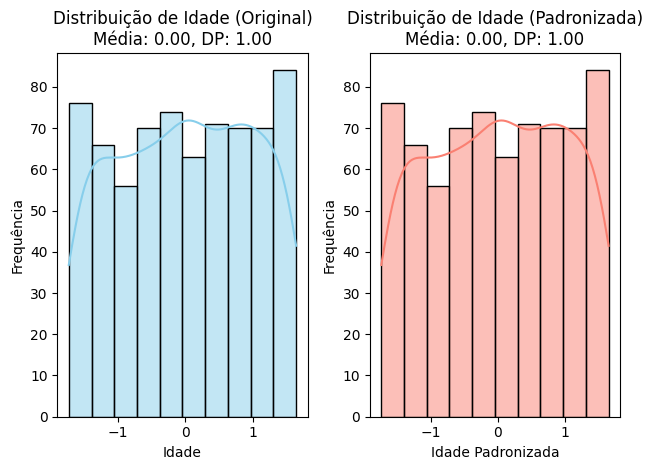

In [67]:
# Distribuição ANTES da Padronização
plt.subplot(1, 2, 1)
sns.histplot(age_original_for_plot, kde=True, bins=10, color='skyblue')
plt.title(f'Distribuição de Idade (Original)\nMédia: {age_original_for_plot.mean():.2f}, DP: {age_original_for_plot.std():.2f}')
plt.xlabel('Idade')
plt.ylabel('Frequência')

# Distribuição DEPOIS da Padronização
plt.subplot(1, 2, 2)
# Passamos a Série 'Age' já padronizada de X_train
sns.histplot(X_train['Age'], kde=True, bins=10, color='salmon')
plt.title(f'Distribuição de Idade (Padronizada)\nMédia: {X_train["Age"].mean():.2f}, DP: {X_train["Age"].std():.2f}')
plt.xlabel('Idade Padronizada')
plt.ylabel('Frequência')

# Chamada da função para imprimir e salvar o gráfico
finalizar_e_salvar_grafico("distribuicao_antes_depois_padronizacao.png")

O histograma de *idade* antes e depois da padronização mostra que os valores foram transformados para ter uma média próxima de zero e um desvio padrão de um, centralizando a distribuição.

Esse resultado é a saída de um pré-processamento bem-sucedido dos dados, prontos para treinar um modelo de Machine Learning. Ele mostra a estrutura e alguns exemplos das features utilizadas (variáveis de entrada) e do target (variável de saída), após todas as transformações.

##Conclusão da etapa de Pré-processamento

Verificamos portanto que completamos com sucesso as etapas cruciais de pré-processamento de dados:

*   **Engenharia de features:** Extraímos informações valiosas da coluna 'Data'.
*   **Codificação de variáveis categóricas:** Suas variáveis textuais/categóricas foram transformadas em um formato numérico que os algoritmos de ML podem processar, e a multicolinearidade foi endereçada com drop_first=True.
*   **Divisão em treino/teste:** Os dados estão prontos para que possamos treinar um modelo e avaliar sua performance em dados não vistos.
*   **Escalonamento de variáveis numéricas:** A 'Idade' foi preparada para algoritmos sensíveis à escala, através da técnica de padronização.

O conjunto de dados X_train e y_train (e X_test, y_test) está agora em um formato pronto para ser usado para treinar um modelo de Machine Learning que preveja o Gasto Total realizado em uma transação.

# Conclusão

A análise e pré-processamento do dataset Sale demonstra a importância de **entender a estrutura dos dados antes da modelagem**. O dataset é limpo e balanceado, com características numéricas bem definidas que permitem uma **análise clara das variáveis numéricas e categóricas**. A etapa de **padronização** é fundamental para **preparar os dados** para diversos algoritmos de aprendizado de máquina, garantindo que o modelo possa aprender eficientemente com as relações presentes nos dados.

As três hipóteses levantadas foram avaliadas:

1.   *A sazonalidade nas compras é diferente entre os gêneros?* Não, vimos através de um gráfico de linhas que, de maneira geral, a sazonalidade nas compras não se diferencia tanto entre os gêneros.

2.   *O ticket médio por compra varia entre faixas etárias?* Através de gráficos como barplot, histograma e boxplot analisamos os diversos comportamentos de compras existentes entre as faixas etárias, incluindo a frequência por faixa de  compras e entendendo como ocorre a variação do ticket médio entre os grupos.

3.   *Existe uma correlação entre a época da compra e a faixa etária do consumidor?* Observamos uma fraca correlação entre as variáveis escolhidas, considerando que o valor próximo de zero indica que não há uma tendência consistente de faixas etárias específicas comprarem em dias específicos da semana continuamente. Constatamos ainda que o dia da semana é um fator crucial que influencia de maneira distinta o comportamento de compra de diferentes gerações. Para essa hipóteses foram utilizados o Mapa de Calor, a Matriz de Correlação e a Correlação de Spearman.